# Bernstein-Vazirani Algorithm
Summer of Science | Maths and Physics Club

Bernstein–Vazirani is a quantum algorithm that helps us find a hidden binary string s using only one query to a special oracle. The oracle flips the phase based on the dot product of your input and s. We start by putting qubits into superposition, run the oracle, then apply Hadamard again. The final measurement directly reveals the secret string s. It's a clean example of how quantum interference can solve problems faster than classical methods.

Ref:
- This video lecture has been used to understand this: [Quantum Algorithms: Bernstein Vazirani Algorithm](https://youtu.be/D0mZaKftobM?si=c3GrKCduY-p6xM4Z)

In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
%matplotlib inline

### Defining the hidden bitstring `s`

In [5]:
s = '1001' # Hidden bitstring
n = len(s)  # Number of qubits

### Building the Bernstein Vazarani Circuit

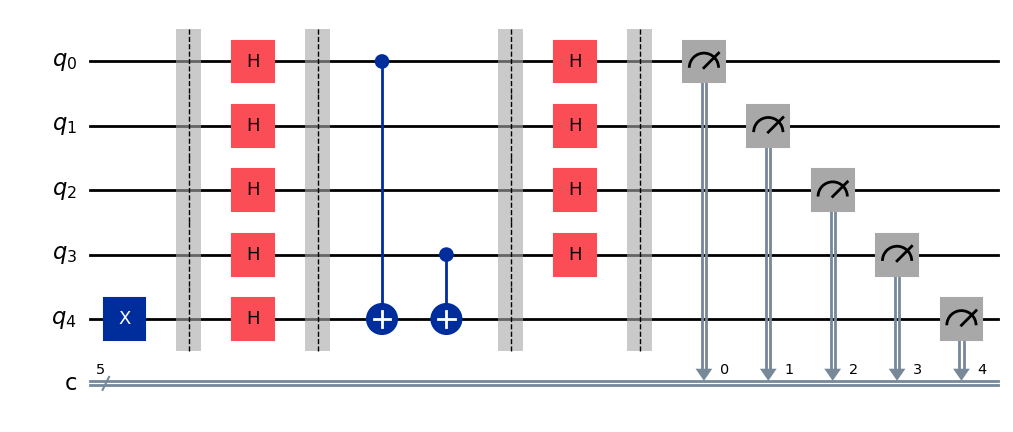

In [14]:
qc = QuantumCircuit(n + 1, n + 1)

# making last qubit |1⟩, it’s needed for oracle part
qc.x(n)
qc.barrier()

# applying hadamard on all qubits to get them in superposition
qc.h(range(n + 1))
qc.barrier()

# putting the oracle for s, using cnot where s has 1s
for i, bit in enumerate(s):
    if bit == '1':
        qc.cx(i, n)
qc.barrier()

# again hadamards to convert phase info back to bitstring
qc.h(range(n))
qc.barrier()

# measuring everything, including the ancilla bit
qc.measure(range(n + 1), range(n + 1))

qc.draw(output="mpl")
plt.show()

### Running the Circuit Locally with `Qiskit-Aer`, Qiskit API is not available rn.

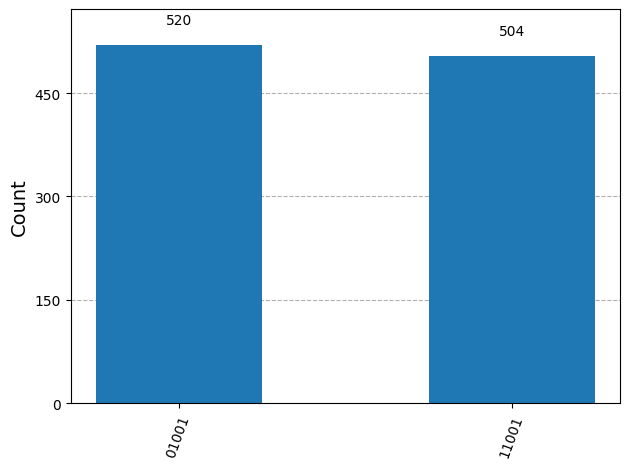

In [15]:
simulator = AerSimulator()
qc = transpile(qc, simulator)

job = simulator.run(qc, shots=1024)
result = job.result()
counts = result.get_counts()

plot_histogram(counts)
plt.show()


Therefore, The Bernstein-Vazirani algorithm successfully recovered the hidden bitstring 1001 in a single run. The first four qubits measured the correct value of s, confirming the algorithm's correctness. The ancilla qubit, used for phase kickback, also behaved as expected, validating its role in the circuit.


Thank You